<a href="https://colab.research.google.com/github/Anders-tech1999/MachineLearning2/blob/main/ExamWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import requests
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [11]:
from google.colab import drive
import zipfile
import os
from PIL import Image
import os
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from torchvision.datasets import ImageFolder
import torchvision.transforms as T

In [12]:
import requests
from google.colab import drive

# URL of the dataset
url = 'https://archive.ics.uci.edu/static/public/908/realwaste.zip'

# Mount Google Drive
drive.mount('/content/gdrive')

# Path to save the downloaded ZIP file directly in Google Drive
zip_path = '/content/gdrive/My Drive/ML2/realwaste.zip'

# Download the ZIP file and save it directly to Google Drive
response = requests.get(url)
with open(zip_path, 'wb') as f:
    f.write(response.content)

print(f"The file has been saved to: {zip_path}")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
The file has been saved to: /content/gdrive/My Drive/ML2/realwaste.zip


In [13]:
from google.colab import drive
import zipfile
import os

# Mount Google Drive
drive.mount('/content/gdrive')

# Define the path to the ZIP file on Google Drive
zip_path = '/content/gdrive/My Drive/ML2/realwaste.zip'

# Specify the directory to extract to
extract_path = '/content'

# Unzip the file in the specified directory
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
    print(f"Files have been extracted to {extract_path}")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Files have been extracted to /content


The directory to find the dataset itself is:

Specify the directory to extract to
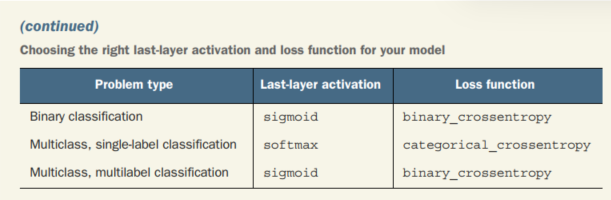
**extract_path = '/content'**

#Question a:
Inspect the images for noise, ambiguous features, and rare features. Plot as many as you need to familiarize yourself with the data. CH5 is helpful here.

In [22]:
from torchvision import datasets
import torchvision.transforms as T
from pathlib import Path
import matplotlib.pyplot as plt

# collect directory
data_dir = Path('/content/realwaste-main/RealWaste')

transformer = T.Compose([T.Resize((32, 32)), T.ToTensor()])
dataset = ImageFolder(data_dir, transform = transformer)

# Initialize a dictionary to store the count of images per class
class_counts = {}

# Iterate over the dataset and count images per class
for _, label in dataset:
    class_name = dataset.classes[label]
    if class_name in class_counts:
        class_counts[class_name] += 1
    else:
        class_counts[class_name] = 1

# Total number of images
total_images = sum(class_counts.values())

# Total number of classes
total_classes = len(dataset.classes)

# Print the summary statistics
print("Summary Statistics of the Dataset:")
print("Total number of images:", total_images)
print("Total number of classes:", total_classes)
print("\nNumber of images per class:")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count}")

Summary Statistics of the Dataset:
Total number of images: 4752
Total number of classes: 9

Number of images per class:
Cardboard: 461
Food Organics: 411
Glass: 420
Metal: 790
Miscellaneous Trash: 495
Paper: 500
Plastic: 921
Textile Trash: 318
Vegetation: 436


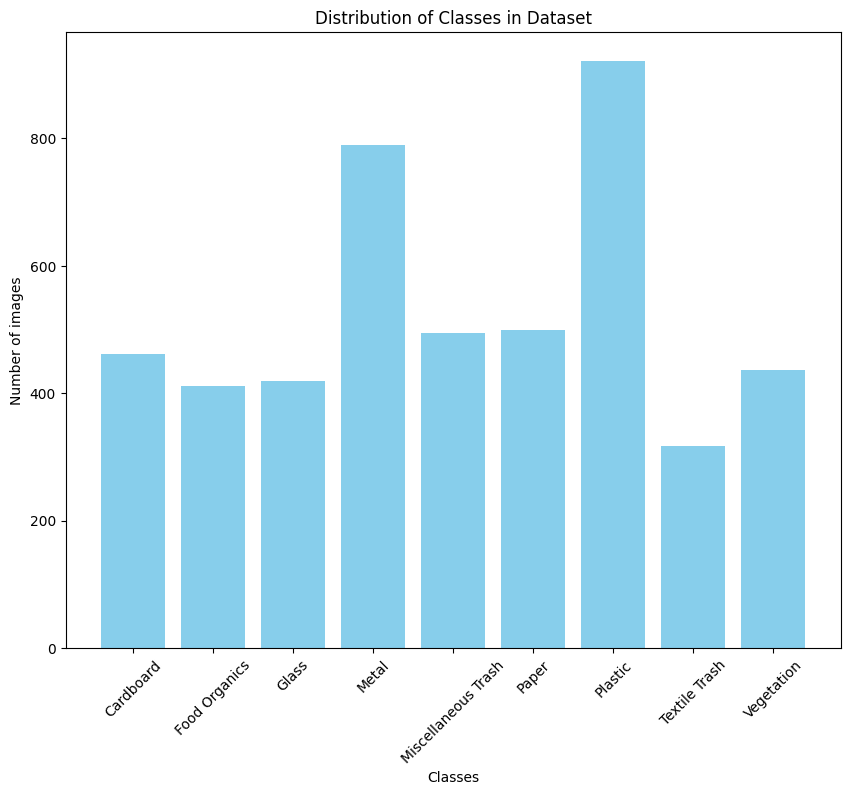

In [17]:
import os
from torchvision import datasets
import matplotlib.pyplot as plt

# Specify the directory containing the classes
data_dir = '/content/realwaste-main/RealWaste'

# Using ImageFolder to load the dataset
dataset = datasets.ImageFolder(data_dir)

# Count the number of images in each class
class_counts = {class_name: 0 for class_name in dataset.classes}
for _, index in dataset.samples:
    class_name = dataset.classes[index]
    class_counts[class_name] += 1

# Data for the histogram
classes = list(class_counts.keys())
counts = list(class_counts.values())

# Creating the histogram
plt.figure(figsize=(10, 8))
plt.bar(classes, counts, color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Number of images')
plt.title('Distribution of Classes in Dataset')
plt.xticks(rotation=45)
plt.show()


If your task is a classification problem, print the number of instances of each
class in your data. Are the classes roughly equally represented? If not, you will
need to account for this imbalance.

*DLP p. 160*

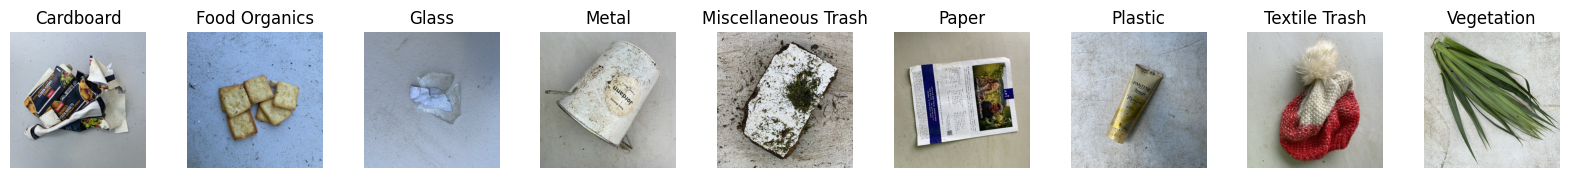

In [21]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import datasets

# Directory containing the image classes
data_dir = '/content/realwaste-main/RealWaste'

# Load the dataset using ImageFolder
dataset = datasets.ImageFolder(data_dir)

# Create a dictionary to store one random image path per class
random_images = {}

# Iterate through each class
for class_index, class_name in enumerate(dataset.classes):
    # Extract all image indices for the current class
    image_indices = [i for i, label in enumerate(dataset.targets) if label == class_index]

    # Choose a random image index
    random_index = random.choice(image_indices)

    # Retrieve the image path from dataset.samples
    image_path = dataset.samples[random_index][0]

    # Store the image path
    random_images[class_name] = image_path

# Plotting
fig, axes = plt.subplots(1, len(random_images), figsize=(20, 10))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

for ax, (class_name, image_path) in zip(axes, random_images.items()):
    # Load the image
    img = Image.open(image_path)

    # Display the image
    ax.imshow(img)
    ax.set_title(class_name)
    ax.axis('off')

plt.show()


#Question b:
b: Read the paper by Single er al. (2023). Focus on what you would need to know to replicate their approach. For instance: Which models do they train? What’s the learning rate? Which kind of data augmentation do they use? How well do their models perform?

**This is performed in "Opslag"**

#Question c:
o	c: Go through as many points on the universal workflow of machine learning in CH6 as you find relevant (e.g., skip deployment, i.e., CH6.3). Use the same training/validation procedure and split as in Single et al. (2023), but do not make a separate test set.

**A separate test set will be provided at the exam.**

The main characteristics due to the train/val split are:

•	Single-label (one possible outcome)

•	Multi-class (9 classes, 0-8)

•	Classification (categorical outcome)

Having these characteristics, the multiclass, single-lable classification suggests:

- softmax as Last-layer activation
- categorical_crossentropy as Loss function

**RGB characteristics**

The RealWaste dataset is of RGB format having depth: 3

- Meaning that RedGreenBlue is the colorscheme

- The MNIST dataset is of depth: 1 (levels of grey)

In [27]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory

# Create a training dataset
train_dataset = image_dataset_from_directory(
    directory='/content/realwaste-main/RealWaste',  # Path to the main directory
    image_size=(524, 524),                          # Resize all images to 180x180
    batch_size=32,                                  # Number of images to return in each batch
    seed=123,
    validation_split = 0.2,
    subset='training',
    label_mode='categorical'          # Labels are returned as integers (you can also use 'categorical' or 'binary')
)

# Create a validation dataset
validation_dataset = image_dataset_from_directory(
    directory='/content/realwaste-main/RealWaste',  # Path to the main directory
    image_size=(180, 180),                          # Resize all images to 180x180
    batch_size=32,                                  # Number of images to return in each batch
    seed=123,
    validation_split = 0.2,
    subset='validation',
    label_mode='categorical'
)

Found 4752 files belonging to 9 classes.
Using 3802 files for training.
Found 4752 files belonging to 9 classes.
Using 950 files for validation.


In [29]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 524, 524, 3)
labels batch shape: (32, 9)


##Fitting model

In [30]:
history = model.fit(
  train_dataset,
  epochs=30,
  validation_data=validation_dataset,
  callbacks=callbacks)

callbacks = [
  keras.callbacks.ModelCheckpoint(
    filepath="convnet_from_scratch.keras",
    save_best_only=True,
    monitor="val_loss")
]
### THIS IS WAY TO SOON...

NameError: name 'model' is not defined